In [47]:
# FINAL PROJECT
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
# Import the data-set
df = pd.read_csv('archive.csv')


In [49]:
# All rows with no data, no record, and partial shadow are deleted
df2 = df.dropna()

df3 = df2[~df2.Punxsutawney_Phil.str.contains("No Record")]
df3 = df3[~df3.Punxsutawney_Phil.str.contains("Partial Shadow")]

print(df3.columns)

Index(['Year', 'Punxsutawney_Phil', 'February Average Temperature',
       'February Average Temperature (Northeast)',
       'February Average Temperature (Midwest)',
       'February Average Temperature (Pennsylvania)',
       'March Average Temperature', 'March Average Temperature (Northeast)',
       'March Average Temperature (Midwest)',
       'March Average Temperature (Pennsylvania)'],
      dtype='object')


In [50]:
# Deleting spaces from column names
df3.columns = ['Year', 'Punxsutawney_Phil', 'February Average Temperature',
       'Feb_Nor',
       'February_Mid',
       'February_Pen',
       'March Average Temperature', 'March_Nor',
       'March_Mid',
       'March_Pen']
print(df3.columns)

#Creating columns of the temperature difference between March and February
df3['Nor_Diff'] = df3['March_Nor'] - df3['Feb_Nor'] 
df3['Mid_Diff'] = df3['March_Mid'] - df3['February_Mid'] 
df3['Pen_Diff'] = df3['March_Pen'] - df3['February_Pen'] 


df3[["Year"]] = df3[["Year"]].apply(pd.to_numeric)

Index(['Year', 'Punxsutawney_Phil', 'February Average Temperature', 'Feb_Nor',
       'February_Mid', 'February_Pen', 'March Average Temperature',
       'March_Nor', 'March_Mid', 'March_Pen'],
      dtype='object')


In [76]:
# Based on your exploration, create a (OLS) regression analysis, and write what you've learned from your analysis
#OLS Regression of Data using data from the Northeast
import statsmodels.api as sm
shadow = []
#0 is No Shadow, meaning Spring and 1 is Shadow, meaning Winter
for x in df3.Punxsutawney_Phil:
   if(x == 'No Shadow'):
    shadow.append(0)
   if(x == 'Full Shadow'):
    shadow.append(1) 


XVar2 = df3[["Nor_Diff"]]
YVar2 = shadow
LinearModel2 = sm.OLS(YVar2, XVar2)
results = LinearModel2.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.684
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              247.3
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                    2.50e-30
Time:                        17:33:17   Log-Likelihood:                         -88.812
No. Observations:                 115   AIC:                                      179.6
Df Residuals:                     114   BIC:                                      182.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [52]:
#OLS Regression of Data using data from the Northeast
YVar3 = df3[["Mid_Diff"]]
XVar3 = shadow
LinearModel3 = sm.OLS(YVar3, XVar3)
results2 = LinearModel3.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:               Mid_Diff   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              202.9
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    4.59e-27
Time:                        16:04:10   Log-Likelihood:                         -384.72
No. Observations:                 115   AIC:                                      771.4
Df Residuals:                     114   BIC:                                      774.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
#OLS Regression of Data using data from the Northeast
YVar4 = df3[["Pen_Diff"]]
XVar4 = shadow
LinearModel4 = sm.OLS(YVar4, XVar4)
results4 = LinearModel4.fit()
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:               Pen_Diff   R-squared (uncentered):                   0.646
Model:                            OLS   Adj. R-squared (uncentered):              0.643
Method:                 Least Squares   F-statistic:                              208.2
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                    1.78e-27
Time:                        16:04:11   Log-Likelihood:                         -377.17
No. Observations:                 115   AIC:                                      756.3
Df Residuals:                     114   BIC:                                      759.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

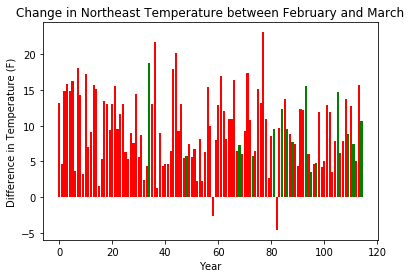

In [54]:
#Graph difference in temperature from the Northeast
import matplotlib.pyplot as plt

colors = []
i = 0
for x in df3.Punxsutawney_Phil:
   if(x == 'No Shadow'):
    colors.append('Green')
   if(x == 'Full Shadow'):
    colors.append('Red') 

height = df3.Nor_Diff
bars = df3.Year
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=colors)

#Red = Full Shadow and Green = No Shadow
#Full Shadow should have larger temperature difference than No Shadow

plt.title('Change in Northeast Temperature between February and March')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature (F)')

plt.show()

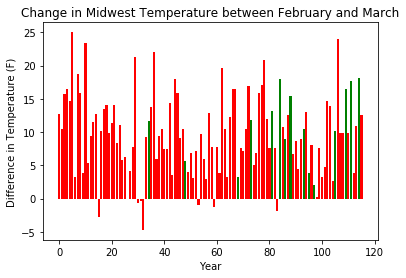

In [30]:
#Graph differences in temperature from the Midwest
#Red = Full Shadow and Green = No Shadow
#Full Shadow should have larger temperature difference than No Shadow

height2 = df3.Mid_Diff
bars2 = df3.Year
y_pos2 = np.arange(len(bars2))
plt.bar(y_pos2, height2, color=colors)
#plt.xticks(y_pos, bars)
plt.title('Change in Midwest Temperature between February and March')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature (F)')
#plt.legend()
plt.show()

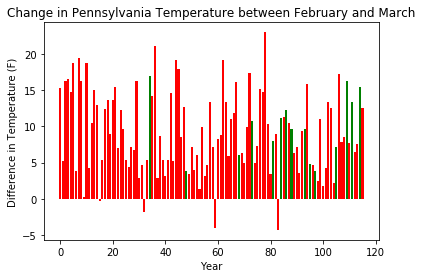

In [32]:
#Graph differences in temperature from the Pennsylvania
#Red = Full Shadow and Green = No Shadow
#Full Shadow should have larger temperature difference than No Shadow

height3 = df3.Pen_Diff
bars3 = df3.Year
y_pos3 = np.arange(len(bars3))
plt.bar(y_pos3, height3, color=colors)
#plt.xticks(y_pos, bars)
plt.title('Change in Pennsylvania Temperature between February and March')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature (F)')
#plt.legend()
plt.show()

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # This is added back by InteractiveShellApp.init_path()


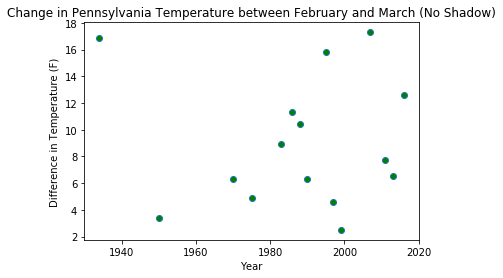

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


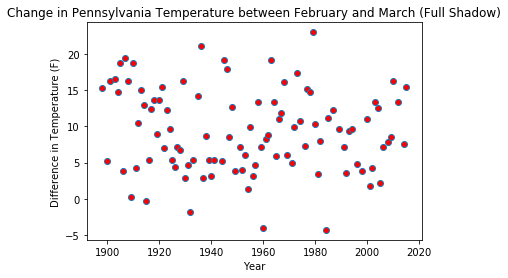

In [72]:
#Scatter plots of No Shadow data and Full Shadow Data

df5 = df3[~df3.Punxsutawney_Phil.str.contains("Full Shadow")] #No Shadow
df6 = df3[~df3.Punxsutawney_Phil.str.contains("No Shadow")] #Full Shadow
#m, b = np.polyfit(x,y, 1)
x=df5.Year
y=df5.Pen_Diff

dfNoShadow_Pen = pd.DataFrame({'x': df5.Year, 'y': df5.Pen_Diff })

plt.plot( 'x', 'y', data=dfNoShadow_Pen, linestyle='none', marker='o', markerfacecolor = 'Green')
plt.title('Change in Pennsylvania Temperature between February and March (No Shadow)')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature (F)')
plt.show()

x2=df6.Year
y2=df6.Pen_Diff
dfShadow_Pen = pd.DataFrame({'x2': df6.Year, 'y2': df6.Pen_Diff })

plt.plot( 'x2', 'y2', data=dfShadow_Pen, linestyle='none', marker='o', markerfacecolor = 'Red')
plt.title('Change in Pennsylvania Temperature between February and March (Full Shadow)')
plt.xlabel('Year')
plt.ylabel('Difference in Temperature (F)')
plt.show()

In [ ]:
# Write a recommendation based on your analysis

We would recommend not to trust Punxsutawney Phil. Although this is a fun tradition, the data clearly shows that there is minimal correlation between whether or not he sees his shadow and seasonal changes.